In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Data Exploration

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data exploration to have a better understanding of our training data

In [4]:
#looking at the data types and the null counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

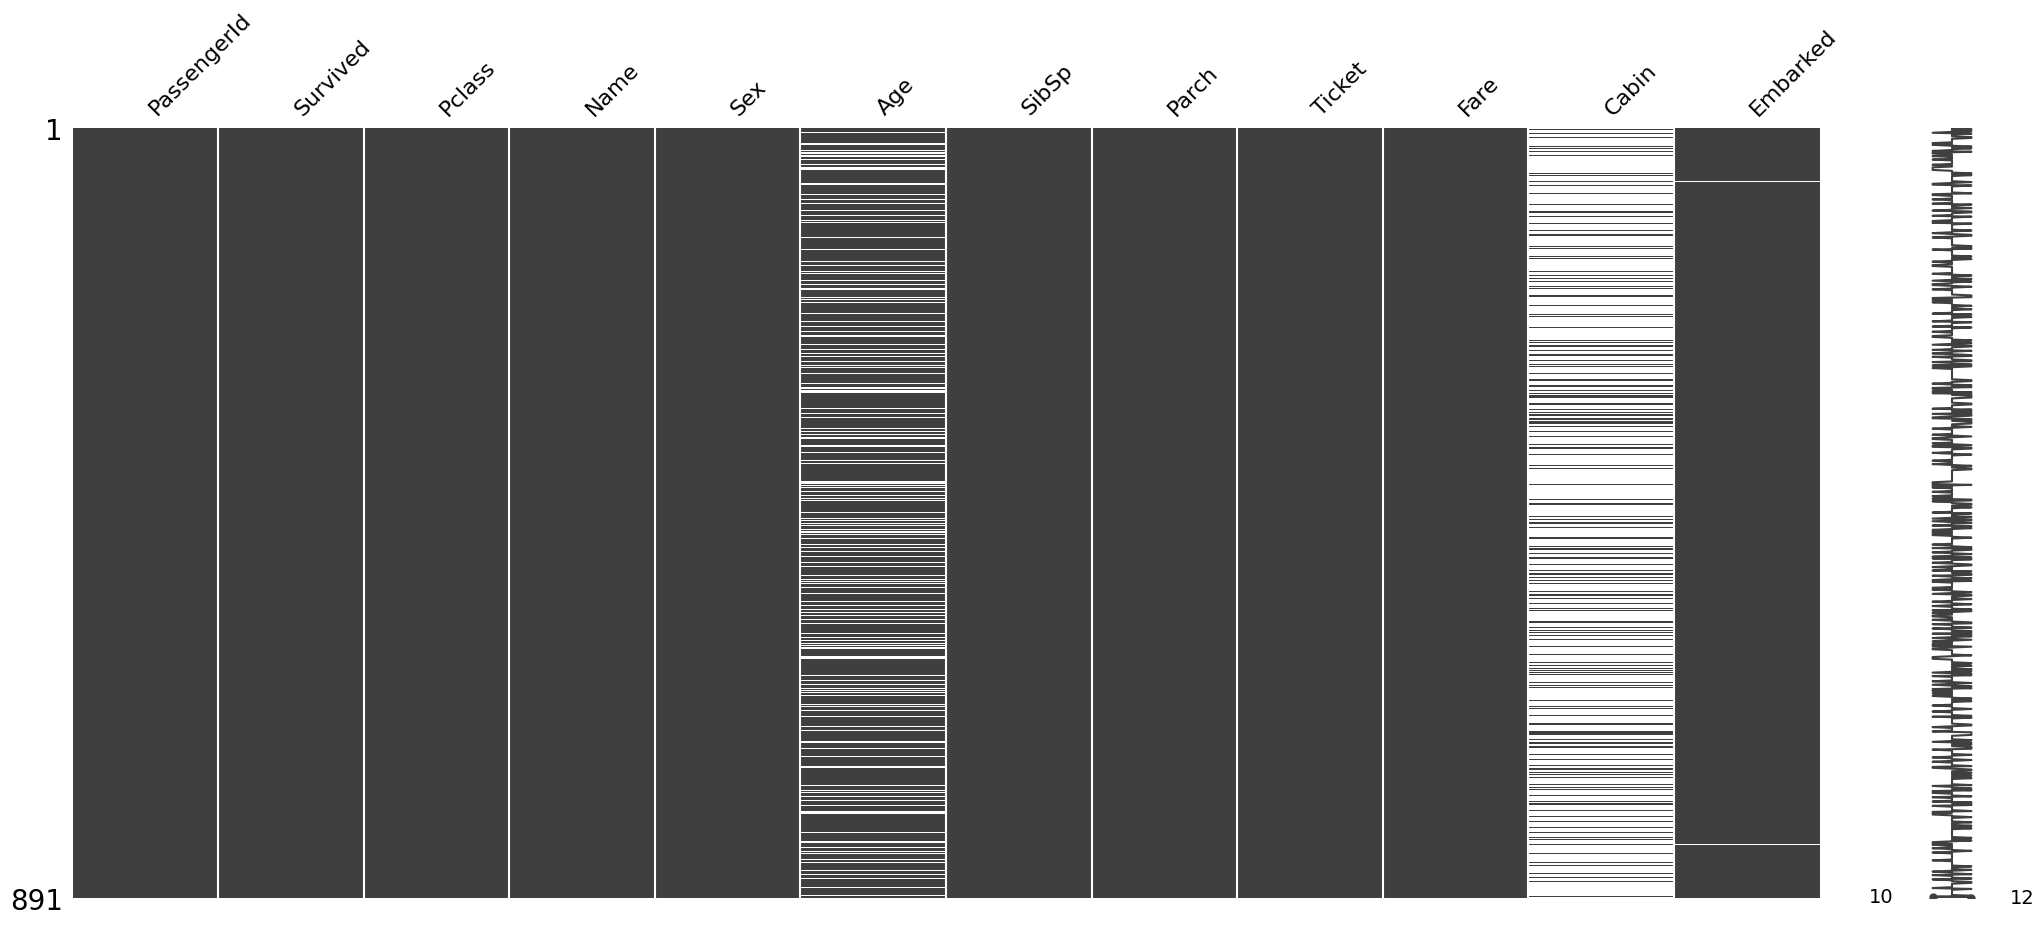

In [5]:
import missingno
#visualizing our missing data
missingno.matrix(train_data)

In [6]:
#getting descriptive statistics of numerical data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#will look at numerical variables and categorical variables separately
num_var = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
cat_var = train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

# **1.1) Numerical data**

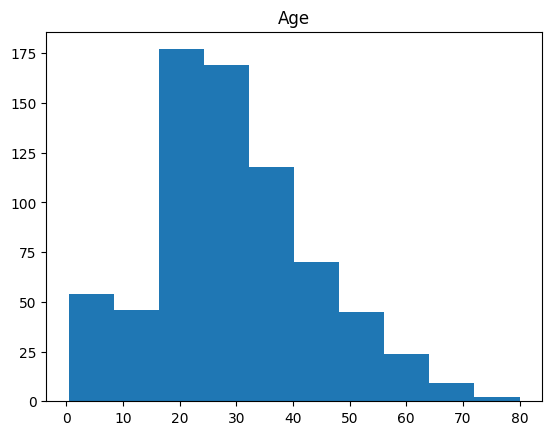

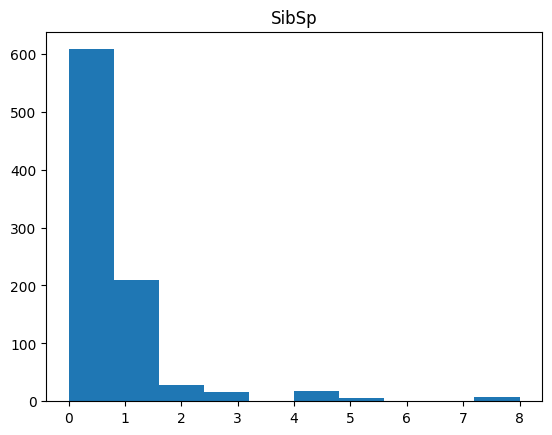

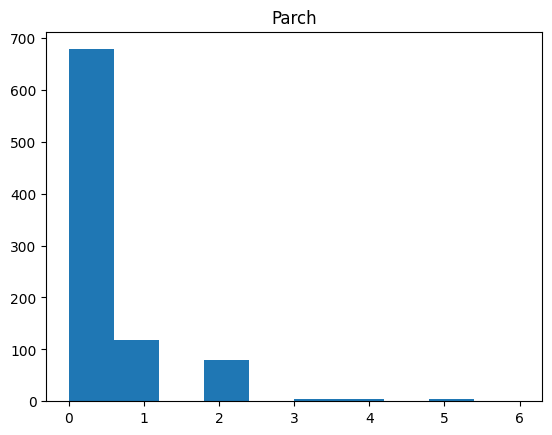

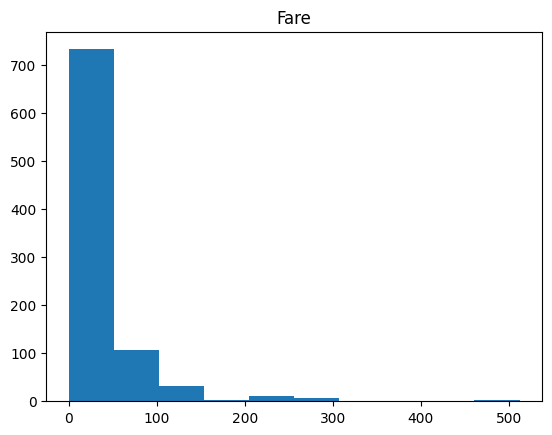

In [8]:
import matplotlib.pyplot as plt
for i in num_var.columns:
    plt.hist(num_var[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

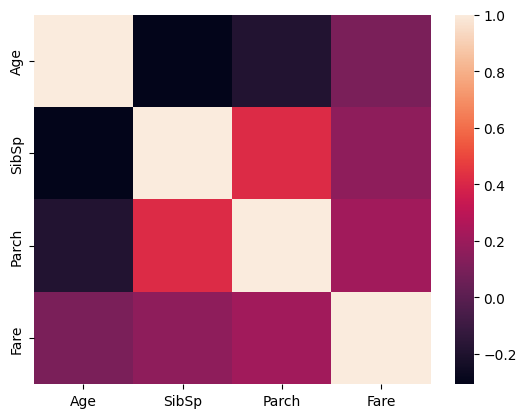

In [9]:
import seaborn as sns
print(num_var.corr())
sns.heatmap(num_var.corr())

In [10]:
#comparing the survival rate between the four numerical variables
pd.pivot_table(train_data, index='Survived', values=['Age', 'SibSp', 'Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# 1.2) Categorical Data

In [11]:
#Looking at categorical variable 'Sex'
#getting counts of the sex 
train_data['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
#mean of survival by sex
train_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by= 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

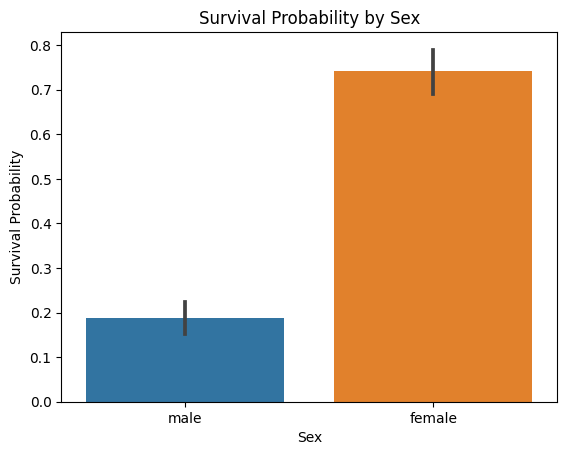

In [13]:
sns.barplot(x='Sex', y='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex')

In [14]:
#categorical variable Pclass
#getting counts of the Pclass column
train_data['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
train_data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by= 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Pclass')

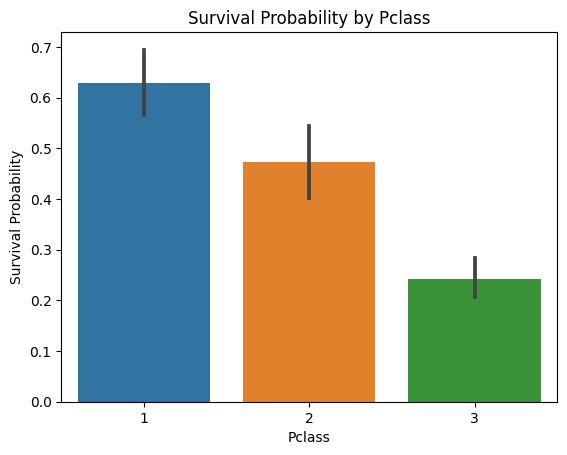

In [16]:
sns.barplot(x='Pclass', y='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass')

In [17]:
#categorical variable Embarked
#getting counts of the Embarked column 
train_data['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [18]:
train_data[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by= 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Embarkation Port')

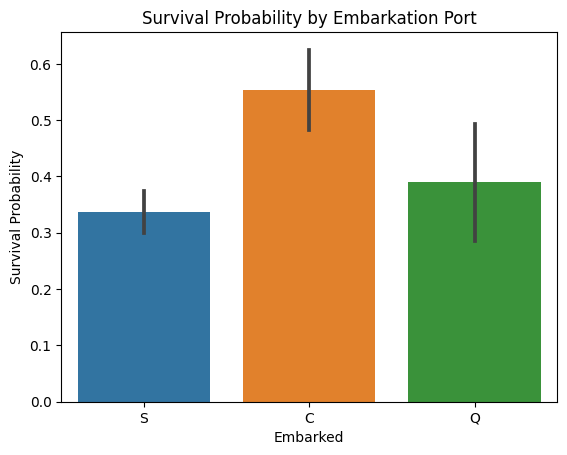

In [19]:
sns.barplot(x='Embarked', y='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarkation Port')

# 2. Data Preprocessing

# 2.1) Dropping variables and fill missing values

In [20]:
#will drop Cabin and Ticket variables
train_data = train_data.drop(['Cabin', 'Ticket'], axis = 1)
test_data = test_data.drop(['Cabin', 'Ticket'], axis = 1)

In [21]:
#checking missing values of train_data
train_data.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [22]:
#fill missing embarked with the most frequent location
most_freq = train_data['Embarked'].dropna().mode()[0]
train_data['Embarked'].fillna(most_freq, inplace = True)

In [23]:
#check missing values of test_data
test_data.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [24]:
#get median of fare and fill
fare_median = test_data['Fare'].dropna().median()
test_data['Fare'].fillna(fare_median, inplace = True)

In [25]:
#will combine the training set and test set to fill in the missing ages
combined_df = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)
combined_df.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [26]:
median_age = combined_df['Age'].median()
combined_df['Age'].fillna(median_age, inplace = True)
combined_df.isnull().sum().sort_values(ascending = False)

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Now we no longer have missing values in our test and training sets. Will ignore the missing "Survived" because

# 2.2) Data Transformation

In [27]:
#convert the Sex column from 'male' and 'female' to 0 = male and 1 = female
combined_df['Sex'] = combined_df['Sex'].map({'male': 0, 'female': 1})

In [28]:
#normalize the Fare column with log transformation
combined_df['Fare'] = combined_df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

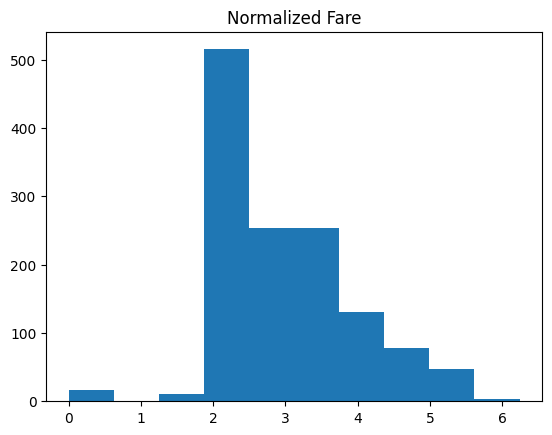

In [29]:
plt.hist(combined_df['Fare'])
plt.title('Normalized Fare')
plt.show()

# 3. Feature Engineering

In [30]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


# 3.1) Classifying Title

In [31]:
combined_df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combined_df['Name']]
combined_df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [32]:
combined_df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [33]:
#grouping titles
combined_df['Title'] = combined_df['Title'].replace(['Rev', 'Dr', 'Col', 'Mlle', 'Major', 'Lady', 'Sir',
                                                    'Mme','Don','Capt','the Countess','Jonkheer','Dona'], 
                                                    'Other')
combined_df['Title'] = combined_df['Title'].replace(['Ms'], 'Miss' )

#dropping Name variables
combined_df = combined_df.drop(['Name'], axis = 1)

In [34]:
combined_df['Title'].value_counts(dropna = False)

Title
Mr        757
Miss      262
Mrs       197
Master     61
Other      32
Name: count, dtype: int64

    Title  Survived
3     Mrs  0.792000
1    Miss  0.699454
0  Master  0.575000
4   Other  0.423077
2      Mr  0.156673


Text(0.5, 1.0, 'Survival Probability by Title')

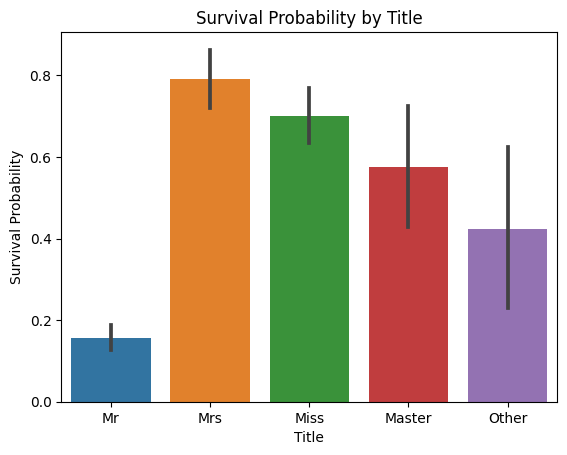

In [35]:
print(combined_df[['Title', 'Survived']].groupby('Title', as_index = False).mean().sort_values(by= 'Survived', ascending = False))
sns.barplot(x= 'Title', y='Survived', data = combined_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Title')

# 3.2) New isAlone Feature

In [36]:
#combine the SibSp and Parch variables to get isAlone feature
combined_df["isAlone"] = 0
combined_df.loc[combined_df['SibSp']+combined_df['Parch'] == 0, 'isAlone'] = 1

In [37]:
#drop the SibSp and Parch variables
combined_df = combined_df.drop(['SibSp', 'Parch'], axis = 1)
combined_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


# 3.3) One-hot Encoding

In [38]:
combined_df = pd.get_dummies(combined_df, columns = ['Title'], dtype=int)
combined_df = pd.get_dummies(combined_df, columns = ['Embarked'], prefix = 'Em', dtype=int)
combined_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,isAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1.981001,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,4.266662,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,2.070022,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,3.972177,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,2.085672,1,0,0,1,0,0,0,0,1


In [39]:
#splitting the combined dataframe back into train_data and test_data
train_data = combined_df[:len(train_data)]
test_data = combined_df[len(train_data):]
test_data = test_data.drop('Survived', axis = 1)


In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,isAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1.981001,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,4.266662,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,2.070022,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,3.972177,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,2.085672,1,0,0,1,0,0,0,0,1


In [41]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,isAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
891,892,3,0,34.5,2.057860,1,0,0,1,0,0,0,1,0
892,893,3,1,47.0,1.945910,0,0,0,0,1,0,0,0,1
893,894,2,0,62.0,2.270836,1,0,0,1,0,0,0,1,0
894,895,3,0,27.0,2.159003,1,0,0,1,0,0,0,0,1
895,896,3,1,22.0,2.508582,0,0,0,0,1,0,0,0,1


# 4) Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_features = train_data.drop('Survived', axis=1)
train_labels = train_data['Survived']
test_features = test_data

# Assuming you have processed and split your data into features and labels
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2)

# Initialize the Random Forest Classifier
num_trees = 300
max_depth = 5
min_samples_split = 2

random_forest = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, min_samples_split=min_samples_split)

# Train the Random Forest
random_forest.fit(X_train, y_train)

# Make predictions on the test set
predictions = random_forest.predict(X_test)
test_predictions = random_forest.predict(test_data)

# Create a DataFrame with the predictions
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions}).astype('int64')
output.to_csv('submission_newforest.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


# 5) Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_features, train_labels)
prediction_label = logreg.predict(test_features)
acc_logreg = round(logreg.score(train_features, train_labels) * 100,2)
acc_logreg

#converting into integer data type
for index in range(len(prediction_label)):
    print("Digitized: " + str(int(prediction_label[index])))

output_LR = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction_label}).astype('int64')
output_LR.to_csv('submission_lr.csv', index=False)
print("Your submission was successfully saved!")

Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 0
Digitized: 0
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 0
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 1
Digitized: 0